![](Sentiment_Analysis.png)

# Twitter Sentiment Analysis
Author: Volha Puzikava
***

## Disclaimer
The described analyses fulfill educational purposes only. The hypothetical business case and the results of sentiment analysis should not be perceived as real customers' attitudes and served as a push for remedial actions, as they have not been approved by any professional media organization.
***

## Overview
Sentiment analysis, also referred to as opinion mining, is an approach that identifies the emotional tone behind a body of text and categorizes pieces of writing as positive, negative or neutral. 

Sentiment analysis is a popular way for organizations to determine and classify opinions about a product, service, or idea. With the help of sentiment analysis companies get a better understanding of how customers feel about their brand, gain insights that help to improve their products and services, make business more responsive to customer feedback, react quickly to negative sentiment and turn it around, monitor brand’s reputation in real-time, and keep customers happy by always putting their feelings first.

This project tends to analyze Twitter sentiment about Apple and Google products in order to detect negative mentions and take remedial actions before they escalate. 
***

## Business Problem
Tweeter Home Enterteinment Group asked to analyze Twitter sentiment about Apple and Google products in order to help businesses monitor their brands and understand customers needs. The main purpose of the analysis was to build an NLP model that could rate the sentiment of a Tweet based on its content, detect angry customers or negative mentions, and take remedial actions before the negativity escalates.
***

## Data Understanding
The data for the analysis was taken from CrowdFlower via data.world links. Human raters rated the sentiment in over 9,000 Tweets as positive, negative, or neutral.

The data represented an imbalanced multiclass classification problem. Since the company wanted to concentrate on the negative Tweets in order to take remedial actions fast, false positives and false negatives were of a similar cost in the analysis. In the case of a false positive, a positive Tweet would be identified as negative and the company would spend resources to analyze it. However, in the case of a false negative, the model would identify a negative Tweet as positive, and the company would miss the sentiment of interest and let negativity escalate. Since the dataset was imbalanced and both false negatives and false positives were balanced in importance, F-measure, or the harmonic mean of the precision and recall values, was chosen as an evaluation metric. However, because in this particular situation false negatives were more important to minimize, while false positives were still significant (for the company it would be better not to miss any negative tweets then spend time on analyzing positives that were identifies as negatives), F-measure with more attention put on recall was preferred.

The solution for this problem was found by using the Fbeta-measure. The Fbeta-measure is an abstraction of the F-measure where the balance of precision and recall in the calculation of the harmonic mean is controlled by a coefficient called beta. The β parameter is a strictly positive value that is used to describe the relative importance of recall to precision. A larger β value puts a higher emphasis on recall than precision, whilst a smaller value puts less emphasis on recall. Three common values for the beta parameter are as follows:

* F0.5-Measure (beta=0.5): More weight on precision, less weight on recall.
* F1-Measure (beta=1.0): Balance the weight on precision and recall.
* F2-Measure (beta=2.0): Less weight on precision, more weight on recall

In our scenario, F2-measure was used to put more weight on recall in order to minimize false negatives.
***

## Data Preparation and Exploration
The data was uploaded and analyzed. It was found out that the dataframes were in reverse order (from August 31, 2022 to January 1, 2017). The format of the date columns were transformed, sorted in an ascending order and the date was  set as index. The type of the "Price" columns was changed from object to float. The dataframes were joined together for further analysis.

In [1]:
import pandas as pd
df = pd.read_csv('Data/tweet_product_company.csv', encoding = 'unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [3]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [4]:
data = df[['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product']]
data = data.rename(columns = {'tweet_text' : 'text', 'is_there_an_emotion_directed_at_a_brand_or_product' : 'category'})
data.head()

,text,category
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [5]:
data['category'] = data['category'].replace("[',]", "", regex=True)
data['category'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I cant tell                            156
Name: category, dtype: int64

In [6]:
data['category'].replace('No emotion toward brand or product', 'Neutral emotion', inplace=True)
data['category'].replace('I cant tell', 'Neutral emotion', inplace=True)
data['category'].value_counts()

Neutral emotion     5545
Positive emotion    2978
Negative emotion     570
Name: category, dtype: int64

In [7]:
# Check for class imbalance
print("Raw Counts:")
print(data['category'].value_counts())
print()
print('Percentages:')
print(data['category'].value_counts(normalize=True))

Raw Counts:
Neutral emotion     5545
Positive emotion    2978
Negative emotion     570
Name: category, dtype: int64

Percentages:
Neutral emotion     0.609810
Positive emotion    0.327505
Negative emotion    0.062686
Name: category, dtype: float64


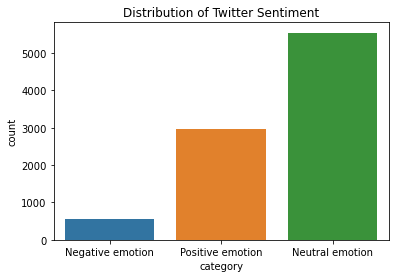

In [8]:
# Plot the distribution of values in column 'stroke'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.countplot(data['category'])
plt.title('Distribution of Twitter Sentiment')
plt.savefig('distribution_sentiment');

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9092 non-null   object
 1   category  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


In [10]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9092 non-null   object
 1   category  9092 non-null   object
dtypes: object(2)
memory usage: 213.1+ KB


In [11]:
label = {
    'Neutral emotion' : 0,
    'Positive emotion' : 1,
    'Negative emotion' : 2
}
label_data = data['category'].map(label)

new_df = data.copy()
new_df['label'] = label_data
new_df.head()

,text,category,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,2
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9092 non-null   object
 1   category  9092 non-null   object
 2   label     9092 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 284.1+ KB


In [13]:
X = new_df[['text', 'category']]
y = new_df['label']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

0    4185
1    2215
2     419
Name: label, dtype: int64 

 0    1359
1     763
2     151
Name: label, dtype: int64


In [15]:
X_train = pd.DataFrame(X_train, columns = ['text', 'category'])
X_train.head()

,text,category
8605,Perfect attention to detail RT @mention Google...,Negative emotion
1303,my iphone was stolen and I got it back !!!!!! ...,Neutral emotion
8759,fuck I love Austin. Just left the Youtube Goog...,Positive emotion
5021,Spotted something rare a few minutes ago...a p...,Neutral emotion
3210,@mention fyi RT @mention I'll be at the Austi...,Neutral emotion


In [16]:
# Standardizing 
# Transform sample data to lowercase
X_train['text'] = X_train['text'].str.lower()
X_train.head()

,text,category
8605,perfect attention to detail rt @mention google...,Negative emotion
1303,my iphone was stolen and i got it back !!!!!! ...,Neutral emotion
8759,fuck i love austin. just left the youtube goog...,Positive emotion
5021,spotted something rare a few minutes ago...a p...,Neutral emotion
3210,@mention fyi rt @mention i'll be at the austi...,Neutral emotion


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6819 entries, 8605 to 7271
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      6819 non-null   object
 1   category  6819 non-null   object
dtypes: object(2)
memory usage: 159.8+ KB


In [18]:
# Remove hashtags and @mention
X_train['text'] = X_train['text'].str.replace('@[A-Za-z0-9_]+', '', regex=True)
X_train['text'] = X_train['text'].str.replace('#[A-Za-z0-9_]+', '', regex=True)
X_train.head()

,text,category
8605,perfect attention to detail rt google recreat...,Negative emotion
1303,my iphone was stolen and i got it back !!!!!!,Neutral emotion
8759,fuck i love austin. just left the youtube goog...,Positive emotion
5021,spotted something rare a few minutes ago...a p...,Neutral emotion
3210,fyi rt i'll be at the austin convention cen...,Neutral emotion


In [19]:
# Tokenization
import nltk
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"
tokenizer = RegexpTokenizer(basic_token_pattern)
X_train['tokenized'] = X_train['text'].apply(tokenizer.tokenize)
X_train.head()

,text,category,tokenized
8605,perfect attention to detail rt google recreat...,Negative emotion,"[perfect, attention, to, detail, rt, google, r..."
1303,my iphone was stolen and i got it back !!!!!!,Neutral emotion,"[my, iphone, was, stolen, and, got, it, back]"
8759,fuck i love austin. just left the youtube goog...,Positive emotion,"[fuck, love, austin, just, left, the, youtube,..."
5021,spotted something rare a few minutes ago...a p...,Neutral emotion,"[spotted, something, rare, few, minutes, ago, ..."
3210,fyi rt i'll be at the austin convention cen...,Neutral emotion,"[fyi, rt, ll, be, at, the, austin, convention,..."


In [20]:
# Remove stopwords
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

In [21]:
def remove_stopwords(token_list):
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

X_train['no_stopwords'] = X_train['tokenized'].apply(remove_stopwords)
X_train.head()

,text,category,tokenized,no_stopwords
8605,perfect attention to detail rt google recreat...,Negative emotion,"[perfect, attention, to, detail, rt, google, r...","[perfect, attention, detail, rt, google, recre..."
1303,my iphone was stolen and i got it back !!!!!!,Neutral emotion,"[my, iphone, was, stolen, and, got, it, back]","[iphone, stolen, got, back]"
8759,fuck i love austin. just left the youtube goog...,Positive emotion,"[fuck, love, austin, just, left, the, youtube,...","[fuck, love, austin, left, youtube, google, pa..."
5021,spotted something rare a few minutes ago...a p...,Neutral emotion,"[spotted, something, rare, few, minutes, ago, ...","[spotted, something, rare, minutes, ago, phone..."
3210,fyi rt i'll be at the austin convention cen...,Neutral emotion,"[fyi, rt, ll, be, at, the, austin, convention,...","[fyi, rt, austin, convention, center, today, f..."


In [22]:
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /Users/olga/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [23]:
from nltk import pos_tag
X_train['tagged'] = X_train.no_stopwords.apply(pos_tag)
X_train.head()

,text,category,tokenized,no_stopwords,tagged
8605,perfect attention to detail rt google recreat...,Negative emotion,"[perfect, attention, to, detail, rt, google, r...","[perfect, attention, detail, rt, google, recre...","[(perfect, JJ), (attention, NN), (detail, NN),..."
1303,my iphone was stolen and i got it back !!!!!!,Neutral emotion,"[my, iphone, was, stolen, and, got, it, back]","[iphone, stolen, got, back]","[(iphone, NN), (stolen, VBN), (got, VBD), (bac..."
8759,fuck i love austin. just left the youtube goog...,Positive emotion,"[fuck, love, austin, just, left, the, youtube,...","[fuck, love, austin, left, youtube, google, pa...","[(fuck, VBN), (love, NN), (austin, NN), (left,..."
5021,spotted something rare a few minutes ago...a p...,Neutral emotion,"[spotted, something, rare, few, minutes, ago, ...","[spotted, something, rare, minutes, ago, phone...","[(spotted, VBN), (something, NN), (rare, JJ), ..."
3210,fyi rt i'll be at the austin convention cen...,Neutral emotion,"[fyi, rt, ll, be, at, the, austin, convention,...","[fyi, rt, austin, convention, center, today, f...","[(fyi, NN), (rt, NN), (austin, JJ), (conventio..."


In [24]:
from nltk.corpus import wordnet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
def tagged(token_list):
    doc_tagged = [(token[0], get_wordnet_pos(token[1])) for token in token_list]
    return doc_tagged

X_train['tagged'] = X_train['tagged'].apply(tagged)
X_train.head()

,text,category,tokenized,no_stopwords,tagged
8605,perfect attention to detail rt google recreat...,Negative emotion,"[perfect, attention, to, detail, rt, google, r...","[perfect, attention, detail, rt, google, recre...","[(perfect, a), (attention, n), (detail, n), (r..."
1303,my iphone was stolen and i got it back !!!!!!,Neutral emotion,"[my, iphone, was, stolen, and, got, it, back]","[iphone, stolen, got, back]","[(iphone, n), (stolen, v), (got, v), (back, r)]"
8759,fuck i love austin. just left the youtube goog...,Positive emotion,"[fuck, love, austin, just, left, the, youtube,...","[fuck, love, austin, left, youtube, google, pa...","[(fuck, v), (love, n), (austin, n), (left, v),..."
5021,spotted something rare a few minutes ago...a p...,Neutral emotion,"[spotted, something, rare, few, minutes, ago, ...","[spotted, something, rare, minutes, ago, phone...","[(spotted, v), (something, n), (rare, a), (min..."
3210,fyi rt i'll be at the austin convention cen...,Neutral emotion,"[fyi, rt, ll, be, at, the, austin, convention,...","[fyi, rt, austin, convention, center, today, f...","[(fyi, n), (rt, n), (austin, a), (convention, ..."


In [26]:
import nltk

lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(token[0], token[1]) for token in text]

X_train['lemmatized'] = X_train.tagged.apply(lemmatize_text)
X_train.head()

,text,category,tokenized,no_stopwords,tagged,lemmatized
8605,perfect attention to detail rt google recreat...,Negative emotion,"[perfect, attention, to, detail, rt, google, r...","[perfect, attention, detail, rt, google, recre...","[(perfect, a), (attention, n), (detail, n), (r...","[perfect, attention, detail, rt, google, recre..."
1303,my iphone was stolen and i got it back !!!!!!,Neutral emotion,"[my, iphone, was, stolen, and, got, it, back]","[iphone, stolen, got, back]","[(iphone, n), (stolen, v), (got, v), (back, r)]","[iphone, steal, get, back]"
8759,fuck i love austin. just left the youtube goog...,Positive emotion,"[fuck, love, austin, just, left, the, youtube,...","[fuck, love, austin, left, youtube, google, pa...","[(fuck, v), (love, n), (austin, n), (left, v),...","[fuck, love, austin, leave, youtube, google, p..."
5021,spotted something rare a few minutes ago...a p...,Neutral emotion,"[spotted, something, rare, few, minutes, ago, ...","[spotted, something, rare, minutes, ago, phone...","[(spotted, v), (something, n), (rare, a), (min...","[spot, something, rare, minute, ago, phone, ma..."
3210,fyi rt i'll be at the austin convention cen...,Neutral emotion,"[fyi, rt, ll, be, at, the, austin, convention,...","[fyi, rt, austin, convention, center, today, f...","[(fyi, n), (rt, n), (austin, a), (convention, ...","[fyi, rt, austin, convention, center, today, f..."


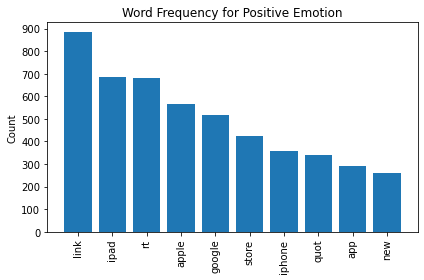

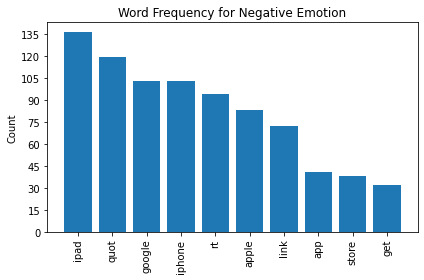

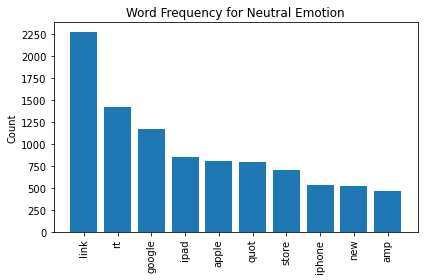

In [27]:
from nltk import FreqDist
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

positive_freq = FreqDist(X_train[X_train['category']=='Positive emotion']['lemmatized'].explode())
negative_freq = FreqDist(X_train[X_train['category']=='Negative emotion']['lemmatized'].explode())
neutral_freq = FreqDist(X_train[X_train['category']=='Neutral emotion']['lemmatized'].explode())

def visualize_top_10(freq_dist, title):
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    ax.bar(tokens, counts)
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='x', rotation=90)
    
visualize_top_10(positive_freq, "Word Frequency for Positive Emotion")
visualize_top_10(negative_freq, "Word Frequency for Negative Emotion")
visualize_top_10(neutral_freq, "Word Frequency for Neutral Emotion")

In [28]:
def lemmatized(text):
    return " ".join(text)

X_train['lemmatized_text'] = X_train.lemmatized.apply(lemmatized)
X_train.head()

,text,category,tokenized,no_stopwords,tagged,lemmatized,lemmatized_text
8605,perfect attention to detail rt google recreat...,Negative emotion,"[perfect, attention, to, detail, rt, google, r...","[perfect, attention, detail, rt, google, recre...","[(perfect, a), (attention, n), (detail, n), (r...","[perfect, attention, detail, rt, google, recre...",perfect attention detail rt google recreate co...
1303,my iphone was stolen and i got it back !!!!!!,Neutral emotion,"[my, iphone, was, stolen, and, got, it, back]","[iphone, stolen, got, back]","[(iphone, n), (stolen, v), (got, v), (back, r)]","[iphone, steal, get, back]",iphone steal get back
8759,fuck i love austin. just left the youtube goog...,Positive emotion,"[fuck, love, austin, just, left, the, youtube,...","[fuck, love, austin, left, youtube, google, pa...","[(fuck, v), (love, n), (austin, n), (left, v),...","[fuck, love, austin, leave, youtube, google, p...",fuck love austin leave youtube google party ma...
5021,spotted something rare a few minutes ago...a p...,Neutral emotion,"[spotted, something, rare, few, minutes, ago, ...","[spotted, something, rare, minutes, ago, phone...","[(spotted, v), (something, n), (rare, a), (min...","[spot, something, rare, minute, ago, phone, ma...",spot something rare minute ago phone make appl...
3210,fyi rt i'll be at the austin convention cen...,Neutral emotion,"[fyi, rt, ll, be, at, the, austin, convention,...","[fyi, rt, austin, convention, center, today, f...","[(fyi, n), (rt, n), (austin, a), (convention, ...","[fyi, rt, austin, convention, center, today, f...",fyi rt austin convention center today fam show...


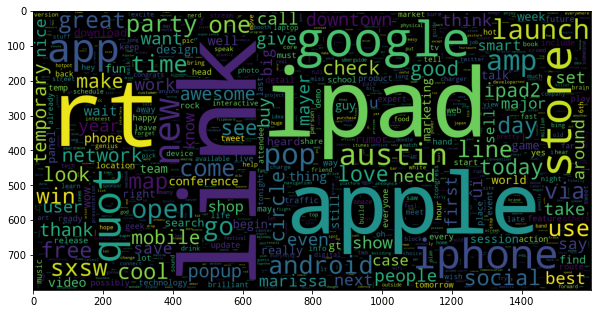

In [33]:
from wordcloud import WordCloud
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(
    " ".join(X_train[X_train['category']=='Positive emotion'].lemmatized_text))
plt.imshow(wc);

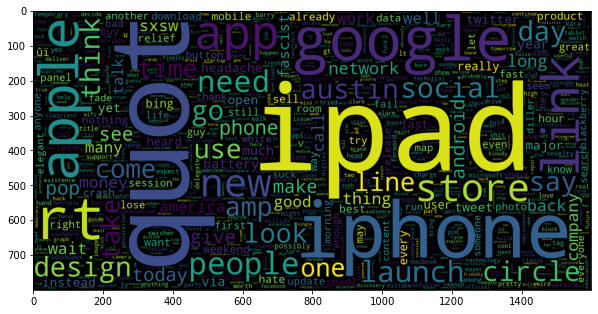

In [34]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(
    " ".join(X_train[X_train['category']=='Negative emotion'].lemmatized_text))
plt.imshow(wc);

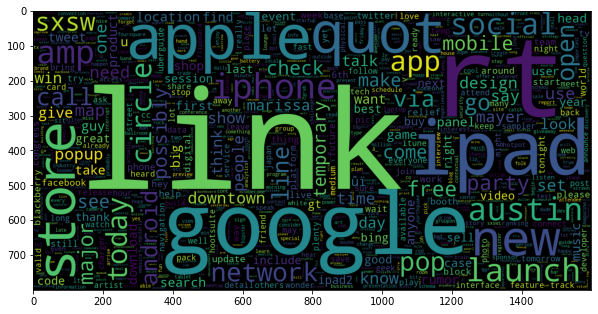

In [35]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(
    " ".join(X_train[X_train['category']=='Neutral emotion'].lemmatized_text))
plt.imshow(wc);

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_vectorized = tfidf.fit_transform(X_train['lemmatized_text'])
df = pd.DataFrame(X_train_vectorized.toarray(), columns=tfidf.get_feature_names())
df.head()

,00,000,00am,00pm,02,03,0310apple,06,10,100,...,ûïspecial,ûïthe,ûïwin,ûò,ûòand,ûó,ûócan,ûólewis,ûólots,ûóthe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Preview the synthetic sample class distribution
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)
print(y_train_resampled.value_counts())

2    4185
1    4185
0    4185
Name: label, dtype: int64


In [38]:
X_test = pd.DataFrame(X_test, columns = ['text', 'category'])
X_test['text'] = X_test['text'].str.lower()
X_test['text'] = X_test['text'].str.replace('@[A-Za-z0-9_]+', '', regex=True)
X_test['text'] = X_test['text'].str.replace('#[A-Za-z0-9_]+', '', regex=True)
basic_token_pattern_test = r"(?u)\b\w\w+\b"
tokenizer_test = RegexpTokenizer(basic_token_pattern_test)
X_test['tokenized'] = X_test['text'].apply(tokenizer_test.tokenize)
X_test['no_stopwords'] = X_test['tokenized'].apply(remove_stopwords)
X_test['tagged'] = X_test.no_stopwords.apply(pos_tag)
X_test['tagged'] = X_test['tagged'].apply(tagged)
X_test['lemmatized'] = X_test.tagged.apply(lemmatize_text)
X_test['lemmatized_text_test'] = X_test.lemmatized.apply(lemmatized)
X_test.head()

,text,category,tokenized,no_stopwords,tagged,lemmatized,lemmatized_text_test
7169,google close to launching new social network -...,Neutral emotion,"[google, close, to, launching, new, social, ne...","[google, close, launching, new, social, networ...","[(google, n), (close, r), (launching, v), (new...","[google, close, launch, new, social, network, ...",google close launch new social network circle ...
2089,iphone charging at {link},Neutral emotion,"[iphone, charging, at, link]","[iphone, charging, link]","[(iphone, n), (charging, v), (link, n)]","[iphone, charge, link]",iphone charge link
2303,"the walk by lady bird lake was lovely, but goo...",Negative emotion,"[the, walk, by, lady, bird, lake, was, lovely,...","[walk, lady, bird, lake, lovely, google, maps,...","[(walk, n), (lady, a), (bird, n), (lake, n), (...","[walk, lady, bird, lake, lovely, google, map, ...",walk lady bird lake lovely google map travel t...
928,ûï not a rumor: apple doing popup store in do...,Positive emotion,"[ûï, not, rumor, apple, doing, popup, store, i...","[ûï, rumor, apple, popup, store, downtown, aus...","[(ûï, a), (rumor, n), (apple, n), (popup, n), ...","[ûï, rumor, apple, popup, store, downtown, aus...",ûï rumor apple popup store downtown austin amp...
5895,rt google to launch major new social network ...,Neutral emotion,"[rt, google, to, launch, major, new, social, n...","[rt, google, launch, major, new, social, netwo...","[(rt, n), (google, n), (launch, n), (major, a)...","[rt, google, launch, major, new, social, netwo...",rt google launch major new social network call...


In [39]:
X_test_vectorized = tfidf.transform(X_test['lemmatized_text_test'])
df_test = pd.DataFrame(X_test_vectorized.toarray(), columns=tfidf.get_feature_names())

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

mnb = MultinomialNB()
mnb.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(mnb.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(mnb.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.8424532058940661
Accuracy of Test Set:
0.5868895732512098


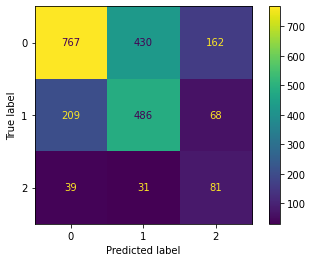

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnb, X_test_vectorized, y_test);
# FP = 230

In [45]:
from sklearn.metrics import classification_report
mnb_preds = mnb.predict(X_test_vectorized)

print('Classification Report of Multinomial Naive Bayes Model:')
print(classification_report(y_test, mnb_preds))

Classification Report of Multinomial Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.76      0.56      0.65      1359
           1       0.51      0.64      0.57       763
           2       0.26      0.54      0.35       151

    accuracy                           0.59      2273
   macro avg       0.51      0.58      0.52      2273
weighted avg       0.64      0.59      0.60      2273



 A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

In [47]:
from sklearn.metrics import f1_score
mnb_f1_score = f1_score(y_test, mnb_preds, average=None)
mnb_f1_score = mnb_f1_score[2]
mnb_f1_score

0.3506493506493507

In [62]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, mnb_preds, average=None, labels=[2], beta=2)

array([0.44262295])

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(logreg.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(logreg.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.8874551971326164
Accuracy of Test Set:
0.6449626044874615


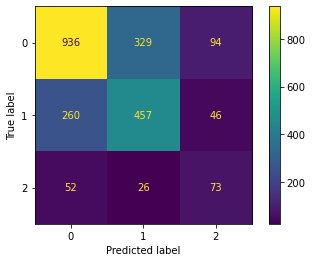

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test_vectorized, y_test);
# FP = 140

In [40]:
logreg_preds = logreg.predict(X_test_vectorized)

print('Classification Report of Logistic Regression Model:')
print(classification_report(y_test, logreg_preds))

Classification Report of Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1359
           1       0.56      0.60      0.58       763
           2       0.34      0.48      0.40       151

    accuracy                           0.64      2273
   macro avg       0.55      0.59      0.57      2273
weighted avg       0.66      0.64      0.65      2273



In [41]:
logreg_precision_score = precision_score(y_test, logreg_preds, average=None)
logreg_precision_score = logreg_precision_score[2]
logreg_precision_score 

0.3427230046948357

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

logreg_tuned = LogisticRegression(random_state=42)
param_grid = {'penalty' : ['l2', 'none'],
              'C' : range(0,1),
              'max_iter' : [50, 100, 150]}
    
grid_search = GridSearchCV(estimator = logreg_tuned,
                           param_grid = param_grid,
                           cv = 3,
                           scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': range(0, 1), 'max_iter': [50, 100, 150],
                         'penalty': ['l2', 'none']},
             scoring='accuracy')

In [43]:
grid_search.best_params_

{'C': 0, 'max_iter': 100, 'penalty': 'none'}

In [44]:
logreg_tuned = LogisticRegression(random_state=42,
                                  multi_class='multinomial',
                                  solver='lbfgs',
                                  C=0,
                                  max_iter=100,
                                  penalty='none')
logreg_tuned.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(logreg_tuned.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(logreg_tuned.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.9573874950219037
Accuracy of Test Set:
0.63308402991641


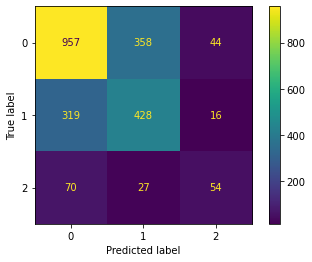

In [45]:
plot_confusion_matrix(logreg_tuned, X_test_vectorized, y_test);

In [46]:
logreg_tuned_preds = logreg_tuned.predict(X_test_vectorized)

print('Classification Report of Logistic Regression Tuned Model:')
print(classification_report(y_test, logreg_tuned_preds))

Classification Report of Logistic Regression Tuned Model:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1359
           1       0.53      0.56      0.54       763
           2       0.47      0.36      0.41       151

    accuracy                           0.63      2273
   macro avg       0.57      0.54      0.55      2273
weighted avg       0.63      0.63      0.63      2273



In [47]:
logreg_tuned_precision_score = precision_score(y_test, logreg_tuned_preds, average=None)
logreg_tuned_precision_score = logreg_tuned_precision_score[2]
logreg_tuned_precision_score

0.47368421052631576

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(knn.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(knn.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.9070489844683393
Accuracy of Test Set:
0.5631324241091069


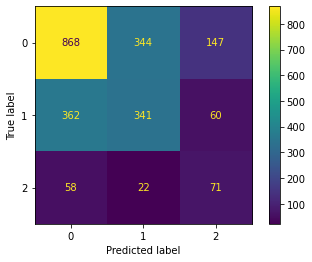

In [49]:
plot_confusion_matrix(knn, X_test_vectorized, y_test);
# FP = 207

In [50]:
knn_preds = knn.predict(X_test_vectorized)

print('Classification Report of KNN Model:')
print(classification_report(y_test, knn_preds))

Classification Report of KNN Model:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66      1359
           1       0.48      0.45      0.46       763
           2       0.26      0.47      0.33       151

    accuracy                           0.56      2273
   macro avg       0.47      0.52      0.48      2273
weighted avg       0.58      0.56      0.57      2273



In [51]:
knn_precision_score = precision_score(y_test, knn_preds, average=None)
knn_precision_score = knn_precision_score[2]
knn_precision_score

0.25539568345323743

In [52]:
knn_tuned = KNeighborsClassifier()
param_grid = {'n_neighbors' : [5, 10, 15, 20],
              'weights' : ['uniform', 'distance'],
              'metric' : ['manhattan', 'euclidean', 'minkowski']}
    
grid_search = GridSearchCV(estimator = knn_tuned,
                           param_grid = param_grid,
                           cv = 3,
                           scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [53]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [54]:
knn_tuned = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
knn_tuned.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(knn_tuned.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(knn_tuned.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.9939466348068499
Accuracy of Test Set:
0.6264848218213814


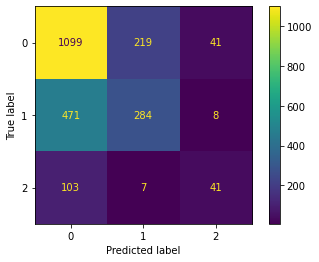

In [55]:
plot_confusion_matrix(knn_tuned, X_test_vectorized, y_test);

In [56]:
knn_tuned_preds = knn_tuned.predict(X_test_vectorized)

print('Classification Report of KNN Tuned Model:')
print(classification_report(y_test, knn_tuned_preds))

Classification Report of KNN Tuned Model:
              precision    recall  f1-score   support

           0       0.66      0.81      0.72      1359
           1       0.56      0.37      0.45       763
           2       0.46      0.27      0.34       151

    accuracy                           0.63      2273
   macro avg       0.56      0.48      0.50      2273
weighted avg       0.61      0.63      0.61      2273



In [57]:
knn_tuned_precision_score = precision_score(y_test, knn_tuned_preds, average=None)
knn_tuned_precision_score = knn_tuned_precision_score[2]
knn_tuned_precision_score

0.45555555555555555

In [58]:
from sklearn.svm import SVC

svc = SVC(random_state=42, probability=True, decision_function_shape='ovo')
svc.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(svc.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(svc.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.9598566308243728
Accuracy of Test Set:
0.6827980642322922


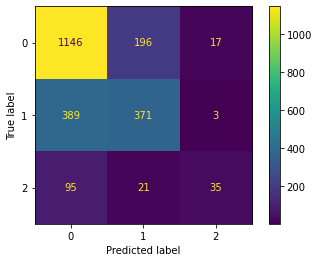

In [59]:
plot_confusion_matrix(svc, X_test_vectorized, y_test);

In [60]:
svc_preds = svc.predict(X_test_vectorized)

print('Classification Report of SVC Model:')
print(classification_report(y_test, svc_preds))

Classification Report of SVC Model:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      1359
           1       0.63      0.49      0.55       763
           2       0.64      0.23      0.34       151

    accuracy                           0.68      2273
   macro avg       0.66      0.52      0.55      2273
weighted avg       0.67      0.68      0.67      2273



In [61]:
svc_precision_score = precision_score(y_test, svc_preds, average=None)
svc_precision_score = svc_precision_score[2]
svc_precision_score

0.6363636363636364

In [62]:
svc_tuned = SVC(random_state=42, probability=True, decision_function_shape='ovo')
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 3, 'scale']}
    
grid_search = GridSearchCV(estimator = svc_tuned,
                           param_grid = param_grid,
                           cv = 3,
                           scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=SVC(decision_function_shape='ovo', probability=True,
                           random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 3, 'scale']},
             scoring='accuracy')

In [63]:
grid_search.best_params_

{'C': 10, 'gamma': 3}

In [64]:
svc_tuned = SVC(random_state=42, probability=True, decision_function_shape='ovo', C=10, gamma=3)
svc_tuned.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(svc_tuned.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(svc_tuned.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.987495021903624
Accuracy of Test Set:
0.6471623405191377


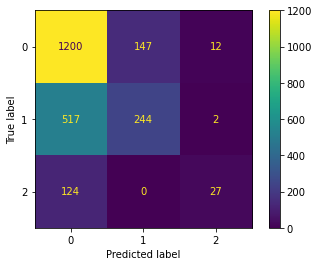

In [65]:
plot_confusion_matrix(svc_tuned, X_test_vectorized, y_test);

In [66]:
svc_tuned_preds = svc_tuned.predict(X_test_vectorized)

print('Classification Report of SVC Model:')
print(classification_report(y_test, svc_tuned_preds))

Classification Report of SVC Model:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      1359
           1       0.62      0.32      0.42       763
           2       0.66      0.18      0.28       151

    accuracy                           0.65      2273
   macro avg       0.64      0.46      0.48      2273
weighted avg       0.64      0.65      0.61      2273



In [67]:
svc_tuned_precision_score = precision_score(y_test, svc_tuned_preds, average=None)
svc_tuned_precision_score = svc_tuned_precision_score[2]
svc_tuned_precision_score

0.6585365853658537

In [68]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(forest.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(forest.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.9941059338908801
Accuracy of Test Set:
0.6709194896612406


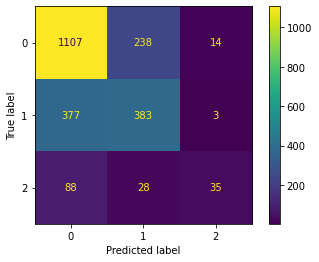

In [69]:
plot_confusion_matrix(forest, X_test_vectorized, y_test);

In [70]:
forest_preds = forest.predict(X_test_vectorized)

print('Classification Report of Random Forest Model:')
print(classification_report(y_test, forest_preds))

Classification Report of Random Forest Model:
              precision    recall  f1-score   support

           0       0.70      0.81      0.76      1359
           1       0.59      0.50      0.54       763
           2       0.67      0.23      0.34       151

    accuracy                           0.67      2273
   macro avg       0.66      0.52      0.55      2273
weighted avg       0.66      0.67      0.66      2273



In [71]:
forest_precision_score = precision_score(y_test, forest_preds, average=None)
forest_precision_score = forest_precision_score[2]
forest_precision_score

0.6730769230769231

In [72]:
forest_tuned = RandomForestClassifier(random_state = 42)
param_grid = {'n_estimators': [75, 100, 125, 150],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features' : ['sqrt', 'log2', 'none']}
    
grid_search = GridSearchCV(estimator = forest_tuned,
                           param_grid = param_grid,
                           cv = 3,
                           scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', 'none'],
                         'n_estimators': [75, 100, 125, 150]},
             scoring='accuracy')

In [73]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 150}

In [74]:
forest_tuned = RandomForestClassifier(random_state=42, n_estimators=150, criterion='entropy', max_features='log2')
forest_tuned.fit(X_train_resampled, y_train_resampled)
print("Accuracy of Train Set:")
print(forest_tuned.score(X_train_resampled, y_train_resampled))
print("Accuracy of Test Set:")
print(forest_tuned.score(X_test_vectorized, y_test))

Accuracy of Train Set:
0.9941059338908801
Accuracy of Test Set:
0.6775186977562693


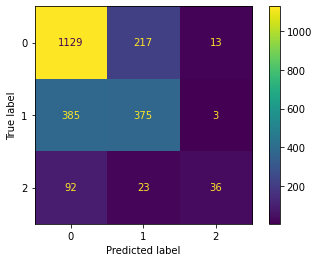

In [75]:
plot_confusion_matrix(forest_tuned, X_test_vectorized, y_test);

In [76]:
forest_tuned_preds = forest_tuned.predict(X_test_vectorized)

print('Classification Report of Random Forest Model:')
print(classification_report(y_test, forest_tuned_preds))

Classification Report of Random Forest Model:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1359
           1       0.61      0.49      0.54       763
           2       0.69      0.24      0.35       151

    accuracy                           0.68      2273
   macro avg       0.67      0.52      0.55      2273
weighted avg       0.67      0.68      0.66      2273



In [77]:
forest_tuned_precision_score = precision_score(y_test, forest_tuned_preds, average=None)
forest_tuned_precision_score = forest_tuned_precision_score[2]
forest_tuned_precision_score

0.6923076923076923

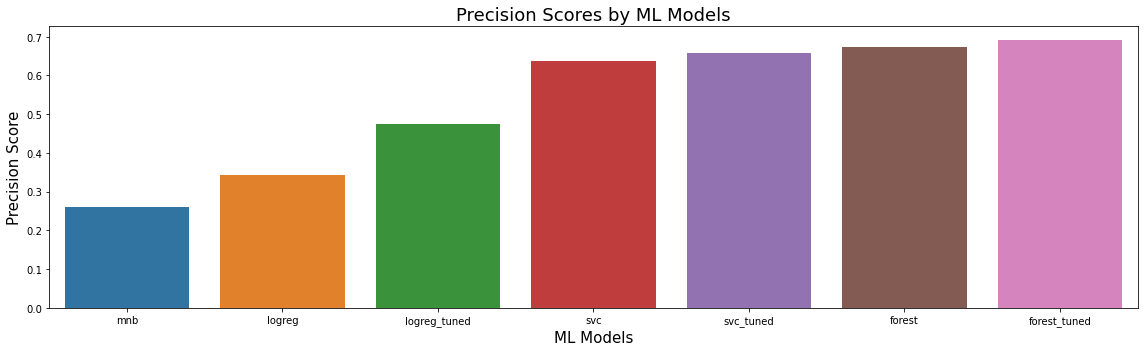

In [79]:
# Plot the graph with the best recall scores for different models
prec_mnb = mnb_precision_score
prec_logreg = logreg_precision_score
prec_logreg_tuned = logreg_tuned_precision_score
prec_svc = svc_precision_score
prec_svc_tuned = svc_tuned_precision_score
prec_forest = forest_precision_score
prec_forest_tuned = forest_tuned_precision_score

precision = [prec_mnb, prec_logreg, prec_logreg_tuned, prec_svc, prec_svc_tuned,
            prec_forest, prec_forest_tuned]
models = ['mnb', 'logreg', 'logreg_tuned', 'svc', 'svc_tuned',
          'forest', 'forest_tuned']
precision_score = [round(num, 3) for num in precision]

df_precision = pd.DataFrame({'models': models, 'precision': precision_score}).sort_values(
    'precision', ascending=True)
plt.figure(figsize=(16,5))
sns.barplot(x='models', y='precision', data=df_precision)
plt.xlabel("ML Models", size=15)
plt.ylabel("Precision Score", size=15)
plt.title("Precision Scores by ML Models", size=18)
plt.tight_layout()
plt.savefig("precision.png", dpi=100)
